In [2]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import itertools
from sklearn import decomposition
import numpy as np
from plotly import graph_objs as go
import plotly.plotly as py

In [24]:
# Read data
df = pd.read_csv("/home/iaradsouza/python_data_science/project/data.csv")
df.shape

(569, 33)

In [25]:
# Filter dataframe by removing unnecessary columns
df = df.iloc[:,1:32]

# Create list of columns
cols = list(df.columns[1:])

In [26]:
# Create correlation matrix
corr = df.corr()

data = [
    go.Heatmap(
        z= corr.values, # subset with ix method (similar to loc and iloc)
        x=corr.columns.values, # set x values
        y=corr.columns.values, # set y values
        colorscale='RdBu', # predefined pallete
        text = True , # sets text elements associated with each (x,y) pair.
        opacity = 1.0, # alpha
        zmin = -1,
        zmax= 1
        
    )
]


layout = go.Layout( # set layout for plotly
    title='Pearson correlation of all variables', # title
    xaxis = dict(ticks=''), # Set x axis layout
    yaxis = dict(ticks=''), # Set y axis layout
    width = 700, height = 700, # Figure size
    
)


fig = go.Figure(data=data, layout=layout) # Creates the figure object for plotly 
py.iplot(fig, filename='correlation_matrix')

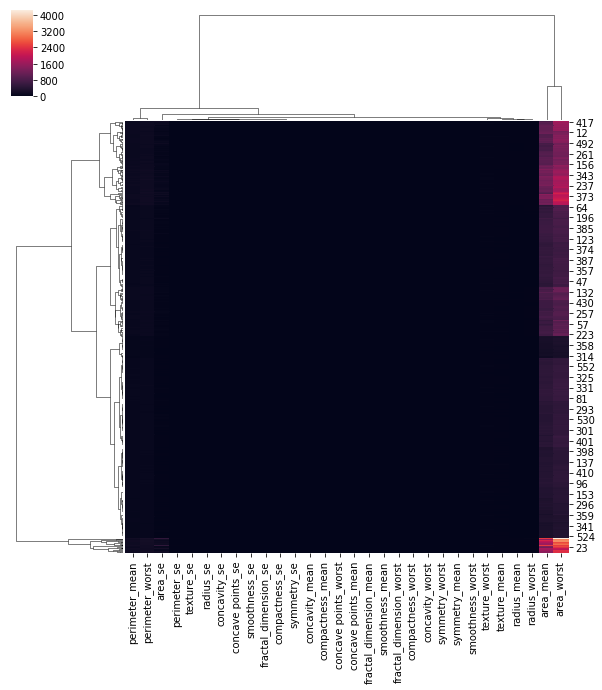

In [28]:
df_clustermap = df.set_index('diagnosis')
df_clustermap = df.drop('diagnosis', axis=1)
sns.clustermap(data = df_clustermap, method = "complete", metric='euclidean')

In [6]:
# Generate all possible combinations between variables
comb = [ list(i) for i in list(itertools.combinations(cols, 2)) ]

# Define regression function to this dataset
def calculate_regression(df, comb, p_value=0.05):
    corr_list = [ list(linregress(df[ comb[i][0] ], df[ comb[i][1] ])) for i in range(len(comb)) ]
    corr_df = pd.DataFrame(corr_list, columns= ['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
    print("Number of significant correlations (p-value <=", p_value, "): ", 
          len(corr_df[ corr_df.p_value <= p_value ]))
    corr_df['comb'] = comb
    return(corr_df)

# Run regression analysis
corr_df = calculate_regression(df, comb)



Number of significant correlations (p-value <= 0.05 ):  389


In [7]:
df_m = df[ df.diagnosis == 'M' ]
df_b = df[ df.diagnosis == 'B' ]

comb = [ list(i) for i in list(itertools.combinations(cols, 2)) ]

corr_df_m = calculate_regression(df_m, comb)
corr_df_b = calculate_regression(df_b, comb)

corr_df_m = corr_df_m.sort_values('p_value', ascending=True)
corr_df_b = corr_df_b.sort_values('p_value', ascending=True)

top_10_m = corr_df_m.loc[:10,:]
top_10_b = corr_df_b.loc[:10,:]


Number of significant correlations (p-value <= 0.05 ):  302
Number of significant correlations (p-value <= 0.05 ):  321


In [8]:
subs = '_mean'
cols_mean = [ i for i in cols if subs in i ]

In [9]:
comb_mean = [ list(i) for i in list(itertools.combinations(cols_mean, 2)) ]

df_m_mean = df_m[ cols_mean ]
df_b_mean = df_b[ cols_mean ]

corr_m_mean = calculate_regression(df_m_mean, comb_mean).sort_values('p_value', ascending=True)
corr_b_mean = calculate_regression(df_b_mean, comb_mean).sort_values('p_value', ascending=True)


Number of significant correlations (p-value <= 0.05 ):  31
Number of significant correlations (p-value <= 0.05 ):  34


In [9]:
corr_m_mean.head(10)

slope    intercept   r_value        p_value   std_err  \
1     6.788929    -3.188534  0.995281  9.825960e-215  0.045672   
2   113.698736 -1007.125296  0.990078  5.845489e-181  1.113528   
17   16.620568  -939.061689  0.987223  1.728075e-169  0.185124   
39    0.415642     0.021165  0.907119   7.150252e-81  0.013308   
35    1.177954    -0.010250  0.847712   9.721692e-60  0.050865   
38    0.106096     0.047276  0.756318   1.444998e-40  0.006333   
34    0.451513     0.016220  0.751690   7.945949e-40  0.027337   
21    0.001148    -0.044498  0.730158   1.382240e-36  0.000074   
36    0.463104     0.020753  0.727349   3.470883e-36  0.030152   
37    0.357362     0.141024  0.698061   2.697191e-32  0.025295   

                                          comb  
1                [radius_mean, perimeter_mean]  
2                     [radius_mean, area_mean]  
17                 [perimeter_mean, area_mean]  
39       [concavity_mean, concave points_mean]  
35          [compactness_mean, concavity_mean]  
38  [compactness_mean, fractal_dimension_mean]  
34   [smoothness_mean, fractal_dimension_mean]  
21       [perimeter_mean, concave points_mean]  
36     [compactness_mean, concave points_mean]  
37           [compactness_mean, symmetry_mean]

In [10]:
corr_b_mean.head(10)

slope   intercept   r_value        p_value   std_err  \
1    6.610058   -2.213821  0.996769   0.000000e+00  0.028271   
2   75.000798 -448.208787  0.994435   0.000000e+00  0.421718   
17  11.266795 -416.869431  0.990653  3.117048e-309  0.082336   
35   0.971811   -0.031769  0.754994   4.846566e-67  0.044797   
36   0.353585   -0.002599  0.750119   9.830075e-66  0.016544   
39   0.260674    0.013711  0.711823   2.002225e-56  0.013651   
38   0.138385    0.051785  0.692198   3.186225e-52  0.007658   
30   1.408958   -0.050213  0.561333   5.001641e-31  0.110250   
34   0.281181    0.036864  0.560336   6.693101e-31  0.022059   
8   -0.002022    0.087424 -0.533492   1.194972e-27  0.000170   

                                          comb  
1                [radius_mean, perimeter_mean]  
2                     [radius_mean, area_mean]  
17                 [perimeter_mean, area_mean]  
35          [compactness_mean, concavity_mean]  
36     [compactness_mean, concave points_mean]  
39       [concavity_mean, concave points_mean]  
38  [compactness_mean, fractal_dimension_mean]  
30         [smoothness_mean, compactness_mean]  
34   [smoothness_mean, fractal_dimension_mean]  
8        [radius_mean, fractal_dimension_mean]

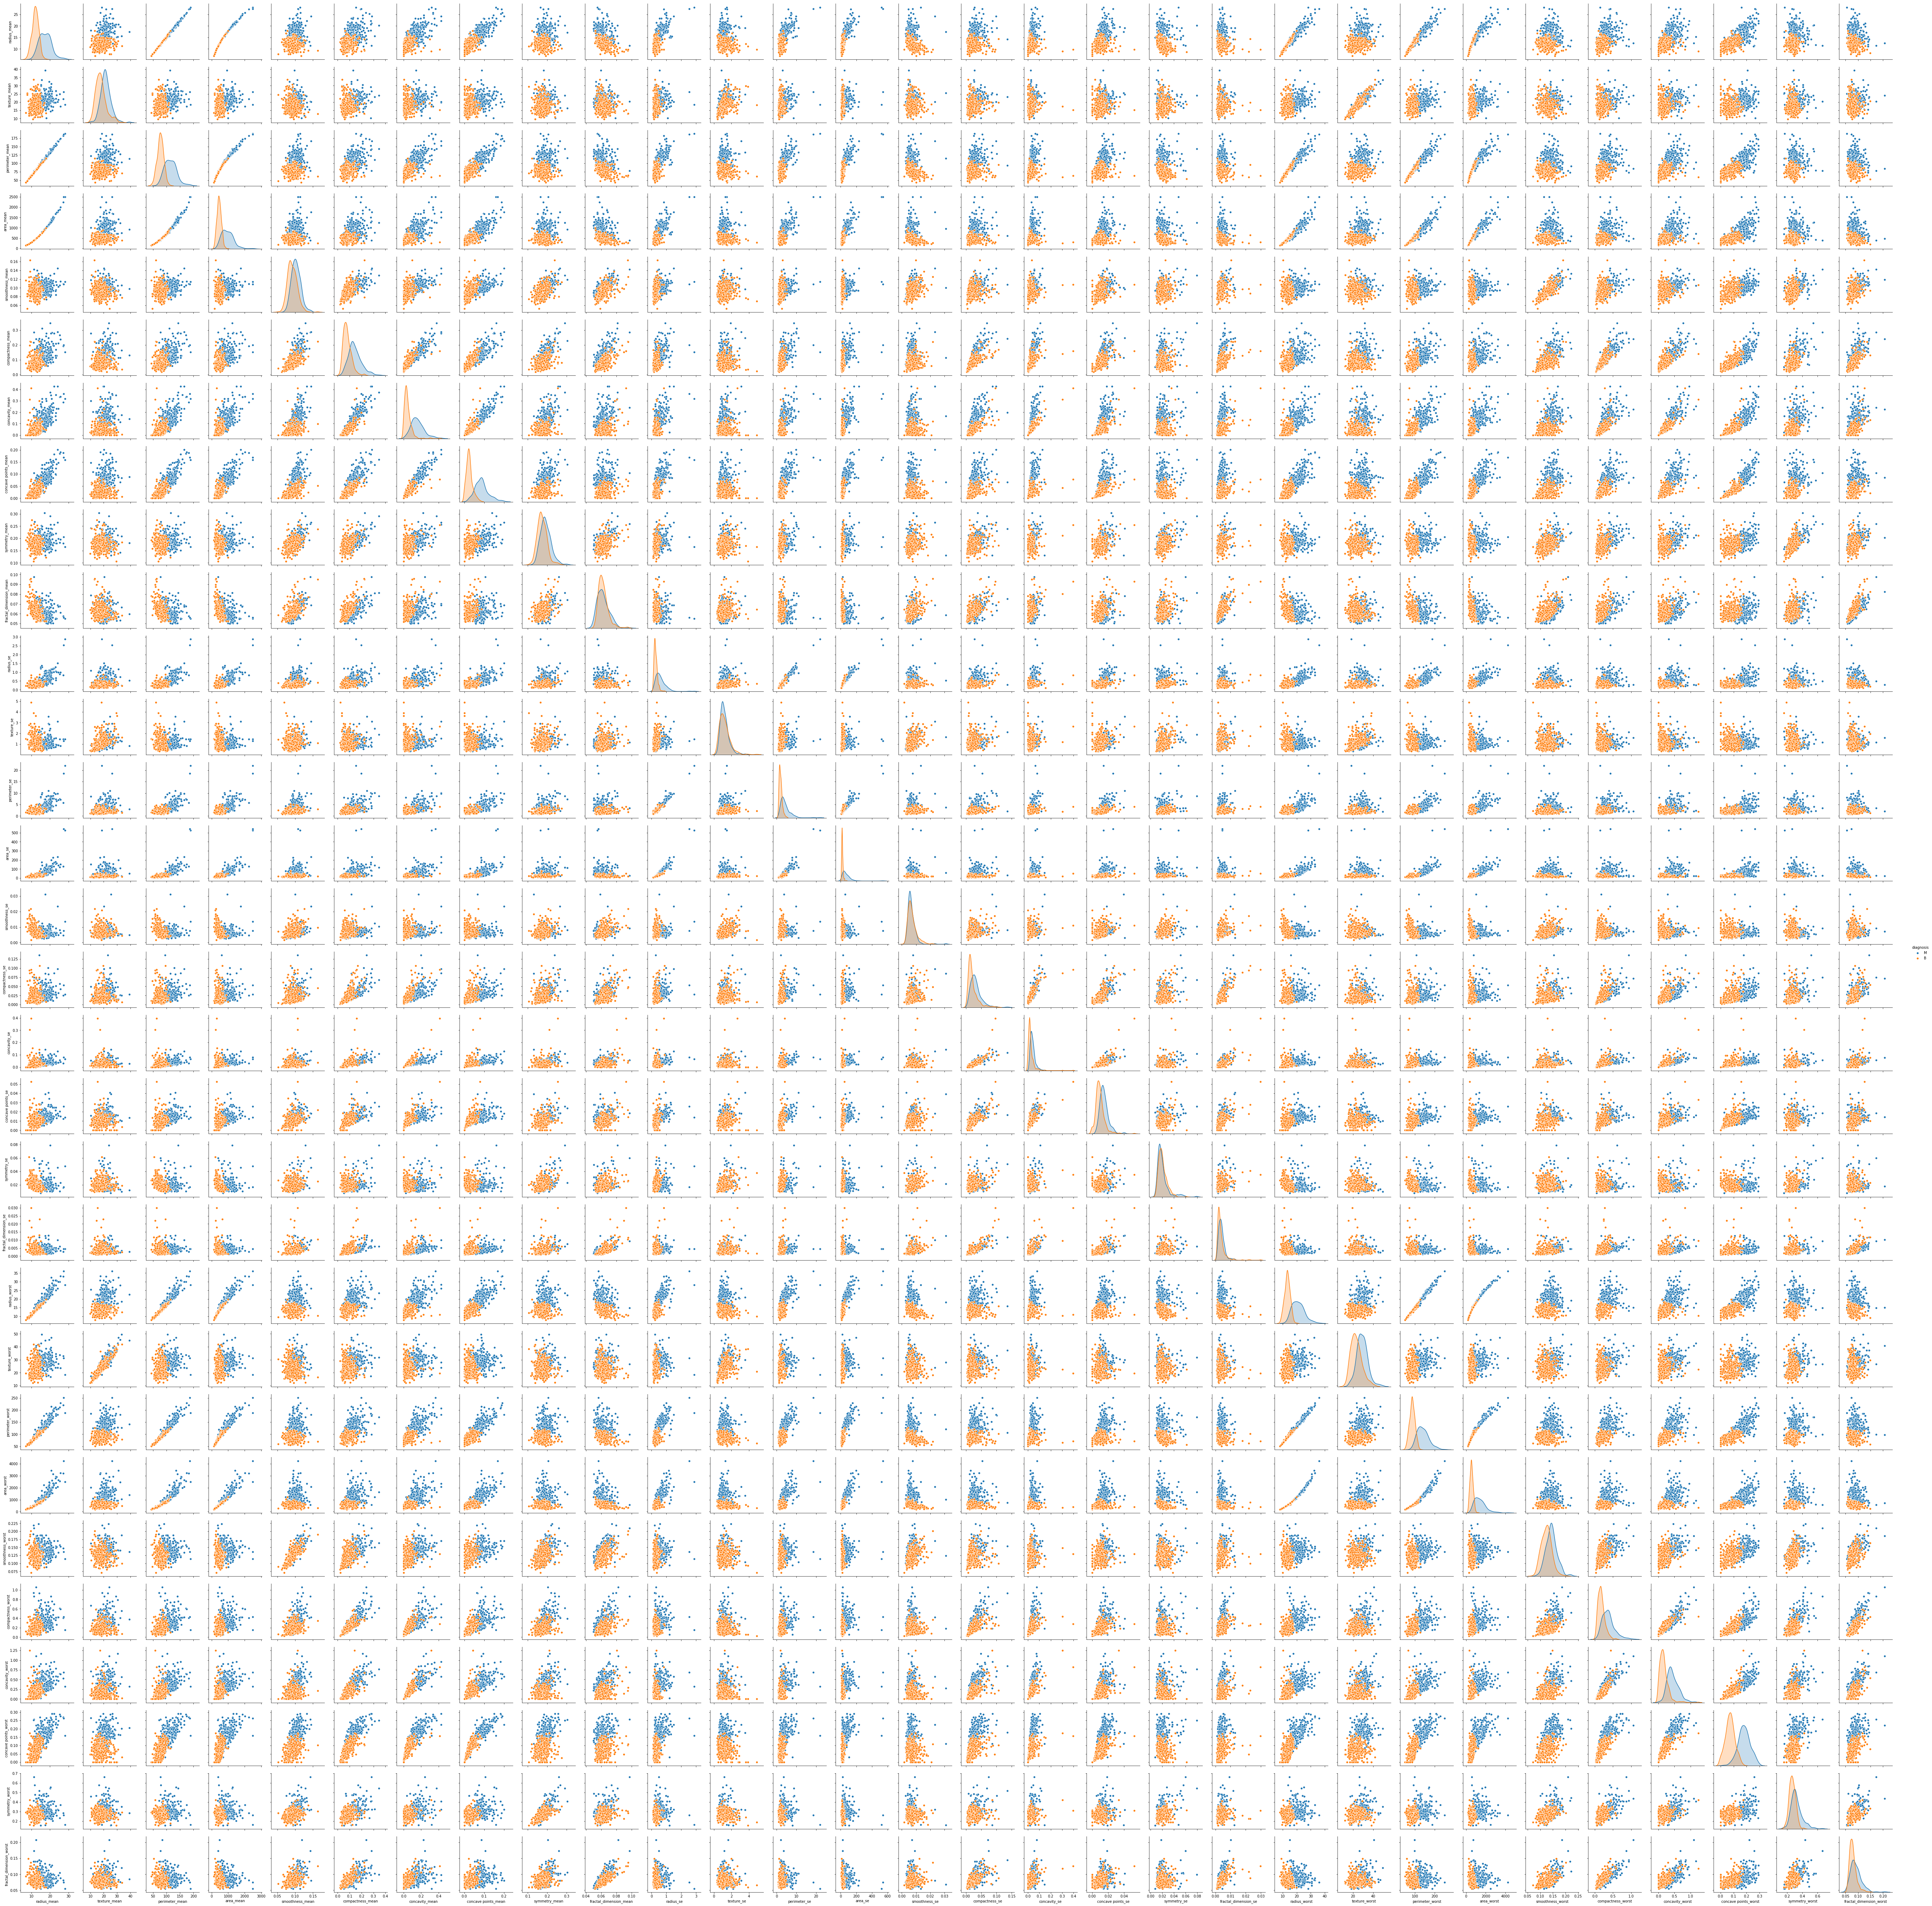

In [10]:
g = sns.pairplot(df, hue="diagnosis")

# PCA


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


x = df.loc[:, cols].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape
np.mean(x),np.std(x)

(1.2487570048507913e-18, 1.0)

In [12]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['pc1', 'pc2'])
principal_breast_Df['diagnosis'] = df['diagnosis']
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


Text(0,0.5,'PC2')

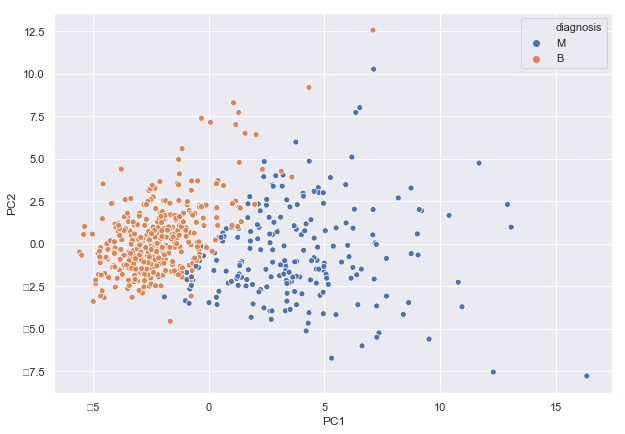

In [13]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.scatterplot(x = 'pc1', y = 'pc2', hue='diagnosis', data=principal_breast_Df)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Random Forest analysis

## 1 Separate independent variables (features) from dependent variables (labels)

In [31]:
from sklearn.model_selection import train_test_split

x = df.loc[:, df.columns != 'diagnosis']
y = df.loc[:, 'diagnosis']


## 2 Set train and tests sets

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3 Train the model on the training set and perform predictions on the test set

In [37]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

## 4 Predict accuracy

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9532163742690059


## 5 Finding important features

In [39]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

feature_imp = pd.Series(clf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

perimeter_worst            0.133543
area_worst                 0.118848
concave points_mean        0.092863
concave points_worst       0.085782
radius_worst               0.083463
perimeter_mean             0.080238
area_mean                  0.063009
radius_mean                0.054041
concavity_worst            0.051494
concavity_mean             0.037809
area_se                    0.025713
compactness_worst          0.023993
texture_worst              0.017712
compactness_mean           0.016276
symmetry_worst             0.015561
radius_se                  0.013850
smoothness_worst           0.012002
texture_mean               0.011603
fractal_dimension_worst    0.009734
perimeter_se               0.007066
texture_se                 0.006234
smoothness_mean            0.005108
compactness_se             0.004670
concave points_se          0.004662
concavity_se               0.004640
symmetry_mean              0.004586
symmetry_se                0.004475
fractal_dimension_se       0

No handles with labels found to put in legend.


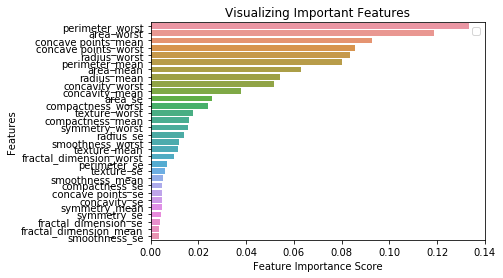

In [40]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()